Student Name: Chelliah Kanthanathan
Student ID: 18263003

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

# Task 1 - Load the data set

In [13]:
df = pd.read_csv('./bank_et1.csv')

# Print the first five rows
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [14]:
# Print the last five rows
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# Task 1 - Identify an attribute that can be the target/dependable variable for 2-class classification.

In [15]:
# column loan could be the target/dependable variable. I assume the column show if the account has an existing loan or not.
# The loan column represents yes (loan exists) or no (no loan) that can be used for 2 class classification

# Task 2 - Calculate statistics for the numerical and categorical attributes.

In [16]:
# Print statistical summary for all numerical attributes
df.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [42]:
# check if there is any missing values for categorical attributes
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [43]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [44]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [45]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

In [46]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [47]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [48]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [49]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [50]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

# Task 2 - Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).

Two numerical attributes selected - age and balance

Text(0,0.5,'frequency')

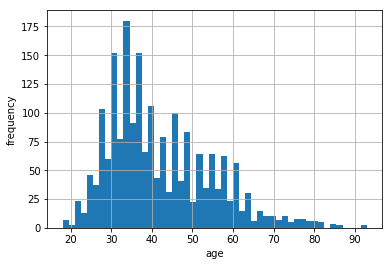

In [18]:
# Plotting a histogram of age to check the distribution of age for 2000 bank accounts
df['age'].hist(bins=50)
plt.xlabel('age')
plt.ylabel('frequency')

age between 30 to 40 has high frequency. Above age 60 and below age 22 have less frequency. This concludes the majority of accounts have age range between 30 to 40 followed by 40 to 60

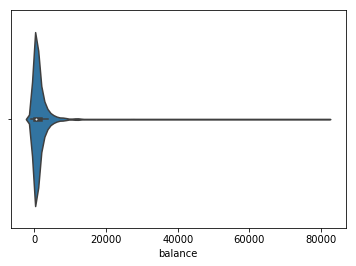

In [19]:
# Plotting Violinplot for balance to check the distribution of balance for 2000 bank accounts
sns.violinplot(x=df['balance'])

above violin plot concludes that most of the accounts have balance above 1000

Two categorical attributes selected - loan and education

Text(0,0.5,'Number of Accounts with loan')

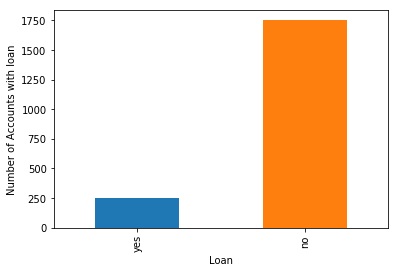

In [20]:
# Plotting bar chart for loan. Plot the accounts with or without loan
frequency_table = df['loan'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('Loan')
plt.ylabel('Number of Accounts with loan')

above bar chart concludes the accounts with loan is 250 and without loan is 1750

Text(0,0.5,'Number of Accounts')

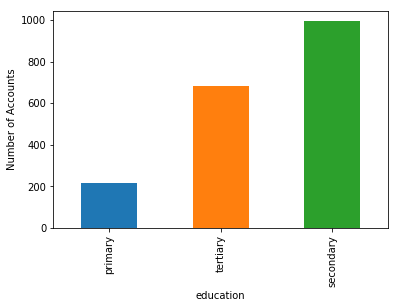

In [21]:
# Plotting bar chart for education.
frequency_table = df['education'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Number of Accounts')

above bar chart concludes most of the accounts have secondary education followed by tertiary education. But only 200 accounts have primary education

# Task 2 - Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

Text(0,0.5,'Number of Accounts')

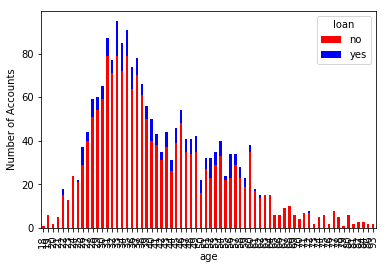

In [22]:
# stacked bar chart for age and loan grouped together to understand the age range that has an existing loan
stacked_chart = pd.crosstab(df['age'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Accounts')

above stacked bar chart concludes that mostly the age range between 30 to 60 has an existing loan

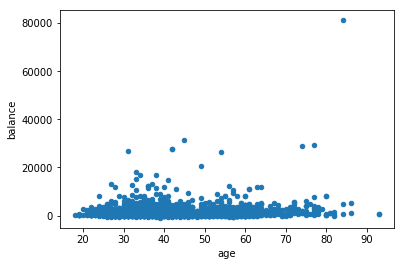

In [23]:
# Examine the relationship between age and balance with a scatter plot.
df.plot.scatter(x='age', y='balance')

above scatter plot concludes that some age range between 80 to 85 has highest balance. At the same time few accounts with in the age range between 30 to 80 has balance between 25000 to 30000. Also another key thing is that any other age group less than 30 or greater than 80 have balance less than 20000.

# Task 2 - Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

we could use the numerical attributes columns age and balance to understand the likelihood of existing loan i.e with less balance the account would likely to have an existing loan. Also the columns age and balance could have some dependency i.e. with young age the balance could be less and old age the balance could be more as less age obviously would have had the accounts in service for only for few years than old age. So age and balance could have some dependency.

In [24]:
# Column loan is a categorical attribute with two categories:

# Yes - the account has an existing loan
# No - the account with out an existing loan
# Let's look at the chances of existing a loan based on age and balance. So we will examine the relation between atributes age, balance and loan.

In [25]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for loan') 
print(frequency_table)

Frequency Table for loan
yes     250
no     1750
Name: loan, dtype: int64


Text(0,0.5,'Number of Accounts')

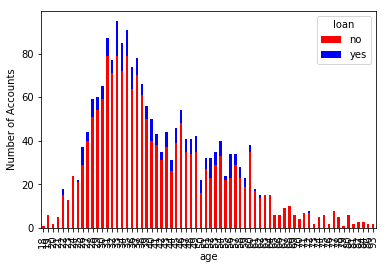

In [26]:
# stacked bar chart for age and loan grouped together to understand the age range that has an existing loan
stacked_chart = pd.crosstab(df['age'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Accounts')

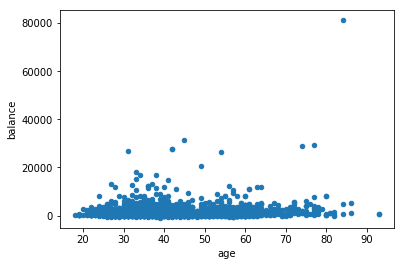

In [27]:
# Examine the relationship between age and balance with a scatter plot.
df.plot.scatter(x='age', y='balance')

above stacked bar chart concludes that mostly the age range between 30 to 60 has an existing loan

above scatter plot concludes that some age range between 80 to 85 has highest balance. At the same time few accounts with in the age range between 30 to 80 has balance between 25000 to 30000. Also another key thing is that any other age group less than 30 or greater than 80 have balance less than 20000.

# Thus we could conclude that the account with age range between 30 and 60 and with balance between 25000 to 30000 has likely chance to apply for loan.

Suggestion: try PLA on this dataset before using the bank dataset

# Task 3

Perceptron model in simple takes 1 or more inputs and aggregates it with weight and return 0 if the sum is above threshold or else returns 1 if the sume is less than threshold. 

The PLA in simple includes below main steps,
1. Initialize weight small randomw numbers and then Compute linear combination of inputs to get the predicted output
2. Update the weights
3. Note down the errors i.e. difference between actual and expected predicted outputs
4. If the error is not 0 after training then repeat above steps from Step 2 until the error converge to 0

Once we find that there is a pattern that exists bbetween input data (INPUT SPACE) and outputs (OUTPUT SPACE) from EDA then the learning could starts as below,

1. Identify an unknown functions which ideally maps the input space to the output space. In another term this function helps to predict the target variable, So this is called Unknown Target Function
2. Identify set of unknown Target Functions which is called Hypothesis Set
3. Implement the learning algorithm that pick the optimal function from the hypothesis set based on the Datat Set
4. After few iterations of updating weight and training example mtultipl times then the final optimal function is found with which the error converge to zero. This final optimal function is called Final Hypothesis

During training the same data that used to predict the output is used again on the final hypothesis for prediction then the error rate that we get during testing is called in sample error. At the same time if the different data than the one used for training is used on the final hypothesis for prediction then the error rate that we get during teating is called out of sample error.

# Task 4 Run the provided perceptron learning algorithm (PLA) 

In [145]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [146]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [147]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [148]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights,x_min), point_on_boundary(weights,x_max)]

In [149]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while True:
        print("No of Iterations:",iterations)
        errors = 0
        iterations+=1
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                weights = weights + y*(np.concatenate((bias,x)))
                print("Weights: ",weights, "& Errors:", errors)
                errors+=1;
        if (errors == 0):
            print("Final Hypothesis Found after ",iterations, " iterations")
            break
    return weights, iterations

In [154]:
def pla_with_pocket_algorithm(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    
    good_err = calc_error(training_in, training_out, weights)
    good_weights = weights
    good_weights_iterations = iterations
    while iterations < 10:
        print("No of Iterations:",iterations)
        errors = 0
        iterations+=1
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                
                err = calc_error(training_in, training_out, weights)
                if (err < good_err):
                    good_err = err
                    good_weights = weights
                    good_weights_iterations = iterations
                    
                weights = weights + y*(np.concatenate((bias,x)))
                print("Weights: ",weights, "& Errors:", errors)
                errors+=1;
        if (errors == 0):
            print("Final Hypothesis Found after ",iterations, " iterations")
            break
            
    print("Good Weights: ",good_weights, " Found at iteration:", good_weights_iterations)
    return weights, iterations

In [151]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

# PLA on make_blobs dataset

In [152]:
list_of_weights = [0.2,0.6,1]
array_of_weights = np.array(list_of_weights)
pla(X,y,array_of_weights)

No of Iterations: 0
Weights:  [ 1.2         2.98903657 -4.31266087] & Errors: 0
No of Iterations: 1
Final Hypothesis Found after  2  iterations


(array([ 1.2       ,  2.98903657, -4.31266087]), 2)

# PLA with pocket algorithm on make_blob data set

In [153]:
list_of_weights = [0.2,0.6,1]
array_of_weights = np.array(list_of_weights)
pla_with_pocket_algorithm(X,y,array_of_weights)

No of Iterations: 0
Weights:  [ 1.2         2.98903657 -4.31266087] & Errors: 0
No of Iterations: 1
Final Hypothesis Found after  2  iterations


UnboundLocalError: local variable 'good_weights' referenced before assignment

# PLA on Bank dataset

In [ ]:
XX = df[['age', 'balance']].values
print(XX)

In [ ]:
yyy = df['loan'].map({'yes': 1, 'no': 0})
print(yyy)

In [ ]:
list_of_weights = [1,1,1]
array_of_weights = np.array(list_of_weights)
#pla(XX,yyy,array_of_weights)

PLA results were unsatisfactory it does not converge to 0

# PLA with pocket algorithm on banking data

In [ ]:
list_of_random_weights = [0,0,0]
array_of_random_weights = np.array(list_of_random_weights)
pla_with_pocket_algorithm(XX,yyy,array_of_random_weights)